In [1]:
import trees as t
import math
import numpy as np
import random

In [38]:
f = 'a'
graph = t.build(f, '2010-01-01', '2010-01-07')
# Date più recenti?
print(graph)

DiGraph with 10786 nodes and 29430 edges


In [3]:
def shortest_path(graph, s, t):
    
    if s == t:
        return "There is no path, source and target nodes are the same", -1
    
    unvisited, shortest_path, predecessor = list(), dict(), dict()
    
    # second point
    for node in graph.nodes():
        shortest_path[node] = math.inf
        unvisited.append(node)
    shortest_path[s] = 0
    
    while unvisited:                          
        current_node = None
        for node in unvisited: 
            if current_node == None:
                current_node = node
            elif shortest_path[node] < shortest_path[current_node]:
                current_node = node
        for neighbor in graph.neighbors(current_node):
            value = shortest_path[current_node] + graph[current_node][neighbor]['weight']
            if value < shortest_path[neighbor]:
                shortest_path[neighbor] = value
                predecessor[neighbor] = current_node
 
        unvisited.remove(current_node)
    
    # now we have to return the path using predecessor dictionary
    if t not in predecessor:
        return "Not possible, there is no path between target and source", -1
    last = t
    path = list([last])
    while last != s:
        path.append(predecessor[last])
        last = predecessor[last]
        
    return path 

Here we consider p1, p and pn choosen that we are sure that return a complete path

In [67]:
p1=202019
pn=227411
p=[235648, 46724, 232279, 117859, 147095]

Here we consider p1, p and pn choosen randomly

In [53]:
def selectRandom(nodes):
  return random.choice(list(graph.nodes))

def selectRandomSeq(nodes):
  return np.random.choice(graph.nodes, 5)

In [54]:
p1=selectRandom(list(graph.nodes))
pn=selectRandom(list(graph.nodes))
p=selectRandomSeq(list(graph.nodes))
p=p.tolist()

In [57]:
print(p1)
print(pn)
print(p)

42751
12178
[2048608, 80111, 241378, 94895, 451475]


we will compute the shortest path between each node and his following, so we are sure that the path visits the nodes in p in order. Then we will join all the different paths and we will obtain the shortest path between p1 and pn that visits in order all the nodes in p.

In [6]:
def fun3(start, stop, p, p1, pn):
    graph = t.build(f, start, stop)
    #create the path between the starting node and the first of the sequence
    path0=list(shortest_path(graph,p1,p[0])[::-1][:-1])
    
    #create a path between a node and his following in the sequence of nodes
    path=[]
    for i in range(len(p)-1):
        percorso=list(shortest_path (graph,p[i],p[i+1]))
        if percorso[1]==-1:
            return "Not possible"
        percorso=percorso[::-1]
        path.extend(percorso[:-1])
        #print(percorso)
        #print(path)
    
    #create the path between the last node of the sequence and the last node of the path (pn)
    pathn=list(shortest_path(graph,p[-1],pn)[::-1])
    
    path.extend(pathn)
    path0.extend(path)
    
    return path0

In [8]:
fun3('2010-01-01','2010-01-07',p,p1,pn)

[202019,
 46724,
 235648,
 46724,
 235648,
 58635,
 167735,
 26327,
 69755,
 242177,
 161640,
 232279,
 117859,
 110603,
 32914,
 84704,
 198729,
 223196,
 147095,
 223196,
 18936,
 198707,
 227411]

In the cell above we can see all the nodes that are "crossed" by our path

VISUALIZATION

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

In [65]:
def visual(start, stop, p, p1,pn):
    lista=fun3('2010-01-01','2010-01-07',p,p1,pn)
    if lista=='Not possible':
        return lista
    edges=[]
    for i in range(len(lista)-1):
        edge = (lista[i], lista[i+1])
        edges.append(edge)
    print(edges)
    grafo=nx.DiGraph(edges)
    color=[]
    for node in grafo:
        if node == p1  or node == pn:
            color.append('green')
        elif node in p:
            color.append('yellow')
        else:
            color.append('blue')

    plt.clf()
    nx.draw_networkx(grafo, node_color=color)
    plt.show()
    

[(202019, 46724), (46724, 235648), (235648, 46724), (46724, 235648), (235648, 58635), (58635, 167735), (167735, 26327), (26327, 69755), (69755, 242177), (242177, 161640), (161640, 232279), (232279, 117859), (117859, 110603), (110603, 32914), (32914, 84704), (84704, 198729), (198729, 223196), (223196, 147095), (147095, 223196), (223196, 18936), (18936, 198707), (198707, 227411)]


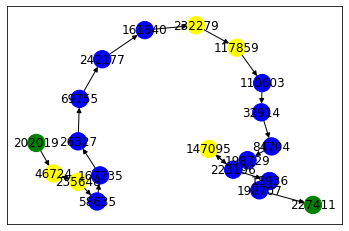

In [68]:
visual('2010-01-01','2010-01-07',p,p1,pn)

The plot show us the shortest path that goes from p1 to pn (green nodes on the path) and visit in order the nodes in p(yellow nodes on the path).

in the cell below we will see another test with the choose of p1, p and pn rnadomly

In [66]:
visual('2010-01-01','2010-01-07',p,p1,pn)

'Not possible'